In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from shutil import copy2

# Paths
input_dir = '/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14'
output_dir = '/kaggle/working/preprocessed_data'
os.makedirs(output_dir, exist_ok=True)

folders = ['train', 'valid']

# Resize images to 640x640 and copy labels
def preprocess_data():
    for folder in folders:
        img_dir = os.path.join(input_dir, folder, 'images')
        label_dir = os.path.join(input_dir, folder, 'labels')
        out_img_dir = os.path.join(output_dir, folder, 'images')
        out_label_dir = os.path.join(output_dir, folder, 'labels')

        os.makedirs(out_img_dir, exist_ok=True)
        os.makedirs(out_label_dir, exist_ok=True)

        for file in tqdm(os.listdir(img_dir)):
            img_path = os.path.join(img_dir, file)
            label_path = os.path.join(label_dir, file.replace('.jpg', '.txt'))
            out_img_path = os.path.join(out_img_dir, file)
            out_label_path = os.path.join(out_label_dir, file.replace('.jpg', '.txt'))

            try:
                # Resize image
                with cv2.imread(img_path) as img:
                    img = cv2.resize(img, (640, 640))
                    cv2.imwrite(out_img_path, img)

                # Copy labels
                if os.path.exists(label_path):
                    copy2(label_path, out_label_path)
                else:
                    print(f"Warning: No label found for {file}")

            except Exception as e:
                print(f"Error processing {file}: {e}")

preprocess_data()
print("✅ Preprocessing completed!")


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from shutil import copy2

# Paths
input_dir = '/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14'
output_dir = '/kaggle/working/preprocessed_data'
os.makedirs(output_dir, exist_ok=True)

folders = ['train', 'valid']
bad_images = []  # Store filenames of images that fail

# Resize images to 640x640 and copy labels
def preprocess_data():
    for folder in folders:
        img_dir = os.path.join(input_dir, folder, 'images')
        label_dir = os.path.join(input_dir, folder, 'labels')
        out_img_dir = os.path.join(output_dir, folder, 'images')
        out_label_dir = os.path.join(output_dir, folder, 'labels')

        os.makedirs(out_img_dir, exist_ok=True)
        os.makedirs(out_label_dir, exist_ok=True)

        for file in tqdm(os.listdir(img_dir)):
            img_path = os.path.join(img_dir, file)
            label_path = os.path.join(label_dir, file.replace('.jpg', '.txt'))
            out_img_path = os.path.join(out_img_dir, file)
            out_label_path = os.path.join(out_label_dir, file.replace('.jpg', '.txt'))

            try:
                # Try loading the image
                img = cv2.imread(img_path)
                if img is None:
                    raise ValueError(f"Unreadable image: {file}")

                # Resize image
                img = cv2.resize(img, (640, 640))
                cv2.imwrite(out_img_path, img)

                # Copy labels
                if os.path.exists(label_path):
                    copy2(label_path, out_label_path)
                else:
                    print(f"Warning: No label found for {file}")

            except Exception as e:
                print(f"⚠️ Skipping {file} due to error: {e}")
                bad_images.append(file)

preprocess_data()

# Save the list of bad images
with open('/kaggle/working/bad_images.txt', 'w') as f:
    for item in bad_images:
        f.write("%s\n" % item)

print("✅ Preprocessing completed!")
print(f"⚠️ {len(bad_images)} images failed. List saved to bad_images.txt")


In [ ]:
!ls /kaggle/working/preprocessed_data/train/images | head -10


In [10]:
data_yaml = """
train: /kaggle/working/preprocessed_data/train/images
val: /kaggle/working/preprocessed_data/valid/images
nc: 8
names:
  - Bad_Apple
  - Bad_Guava
  - Bad_Mango
  - Bad_Orange
  - Good_Apple
  - Good_Guava
  - Good_Mango
  - Good_Orange
"""

# Save the file
with open('/kaggle/working/data.yaml', 'w') as file:
    file.write(data_yaml)

print("✅ `data.yaml` has been created successfully!")


✅ `data.yaml` has been created successfully!


In [1]:
!pip install ultralytics



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 16.4 MB/s eta 0:00:00a 0:00:01


In [ ]:
!cat /kaggle/working/data.yaml


In [ ]:
from ultralytics import YOLO

# ✅ Define the path to `data.yaml`
data_yaml_path = "/kaggle/working/data.yaml"  

# ✅ Load YOLO model
model = YOLO('yolov8s.pt')  # Change to 'yolov8n.pt' if needed

# ✅ Train the model
results = model.train(
    data='/kaggle/working/data.yaml',  # Path to `data.yaml`
    epochs=50,  
    imgsz=640,  
    batch=16,  
    lr0=0.001,  
    device=0,  
    project='/kaggle/working',  
    name='fruit_detection_clean'  
)

print("✅ Training completed successfully!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /kaggle/working/preprocessed_data/valid/images/IMG_20190910_172654_1_jpg.rf.86463bd2de46c5135697ac5d6c04df27.jpg: 640x640 1 Bad_Apple, 502.3ms
Speed: 9.7ms preprocess, 502.3ms inference, 17.5ms postprocess per image at shape (1, 3, 640, 640)


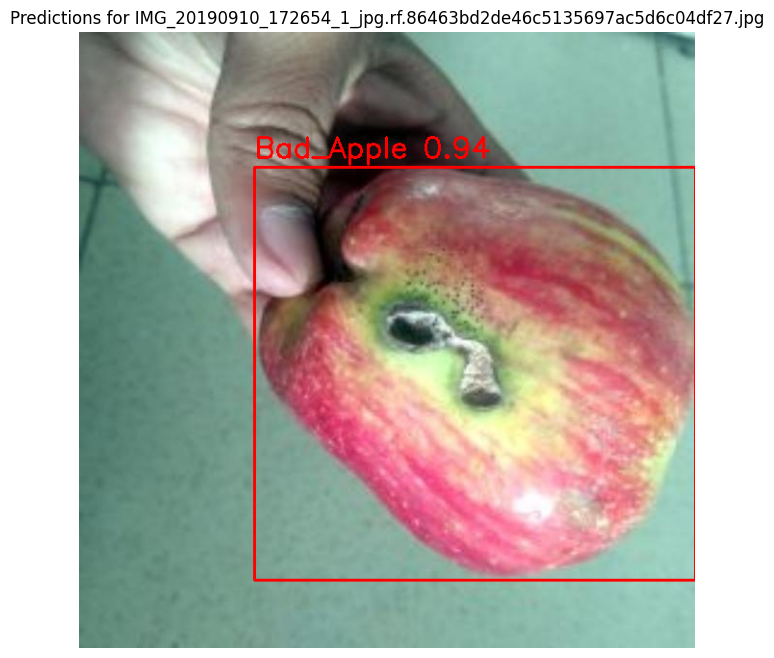


image 1/1 /kaggle/working/preprocessed_data/valid/images/BadOrange-13-_jpg.rf.489ce734fb99dcc7c597b5fd198369f3.jpg: 640x640 1 Bad_Orange, 357.7ms
Speed: 2.0ms preprocess, 357.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


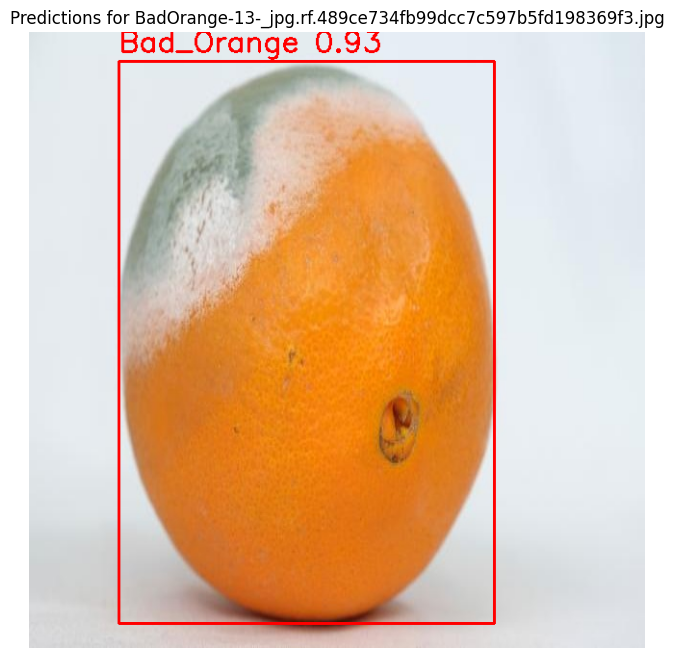

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# ✅ Load the trained model
model_path = "/kaggle/working/fruit_detection_clean2/weights/best.pt"  # Change if needed
model = YOLO(model_path)

# ✅ Define the path to validation images
val_images_dir = "/kaggle/working/preprocessed_data/valid/images"

# ✅ Select one or two images for testing (modify as needed)
test_images = ["IMG_20190910_172654_1_jpg.rf.86463bd2de46c5135697ac5d6c04df27.jpg",
               "BadOrange-13-_jpg.rf.489ce734fb99dcc7c597b5fd198369f3.jpg"]  # Change filenames as needed

for test_image_name in test_images:
    test_image_path = os.path.join(val_images_dir, test_image_name)
    
    # ✅ Run inference
    results = model.predict(test_image_path, conf=0.5)  # Adjust confidence threshold if needed

    # ✅ Load the image
    image = cv2.imread(test_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # ✅ Draw bounding boxes and labels
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        scores = result.boxes.conf.cpu().numpy()
        class_ids = result.boxes.cls.cpu().numpy()
        class_names = result.names

        for box, score, class_id in zip(boxes, scores, class_ids):
            if score >= 0.5:
                x1, y1, x2, y2 = map(int, box)
                label = f"{class_names[int(class_id)]} {score:.2f}"
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw bounding box
                cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  # Draw label

    # ✅ Display the image with detections
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.title(f"Predictions for {test_image_name}")
    plt.axis('off')
    plt.show()



image 1/1 /kaggle/input/siamese-dataset/AnnotatedFruitNet_FruitBox/dataset/FruitBox/Image_1003.jpg: 480x640 1 Good_Apple, 13.9ms
Speed: 2.8ms preprocess, 13.9ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


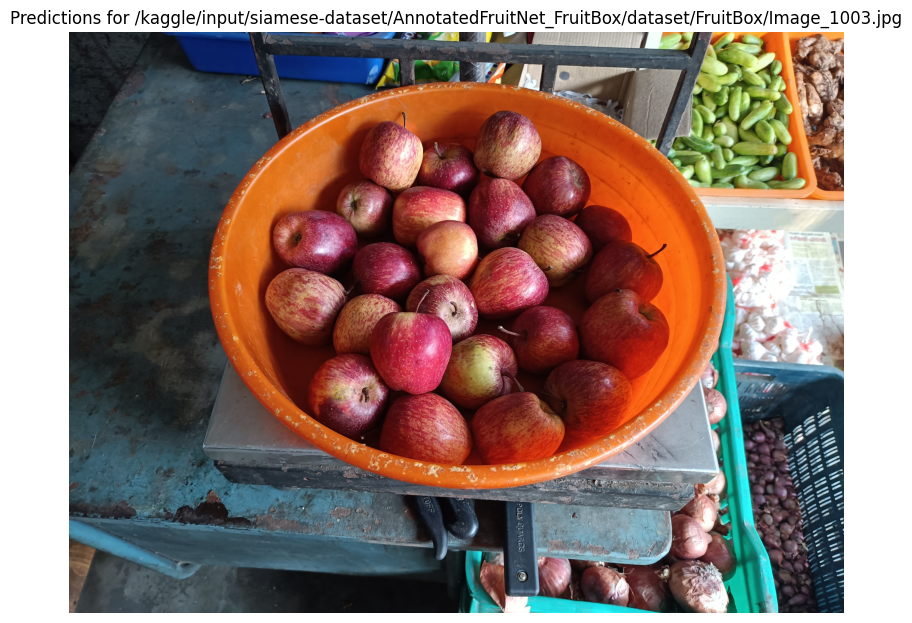

In [ ]:
from ultralytics import YOLO

# ✅ Load the best-trained model on clean data
model = YOLO("/kaggle/working/fruit_detection_clean2/weights/best.pt")

# ✅ Resume training for 50 more epochs (Best for improving accuracy)
results = model.train(
    data="/kaggle/working/data.yaml",  # Ensure it still points to clean images
    epochs=50,  # Continue training for 50 more epochs
    imgsz=640,
    batch=16,
    lr0=0.001,  # Learning rate (you can tune this)
    device=0,  # Use GPU if available
    project="/kaggle/working",
    name="fruit_detection_clean_resume"
)

print("✅ Training resumed successfully on clean data!")


In [ ]:
from ultralytics import YOLO

model = YOLO("/kaggle/working/fruit_detection_clean_resume/weights/best.pt")  # Load latest trained model
metrics = model.val()  # Evaluate performance on validation set

print(metrics)  # Display mAP, precision, recall, etc.



0: 640x640 7 Good_Apples, 16.2ms
Speed: 1.5ms preprocess, 16.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


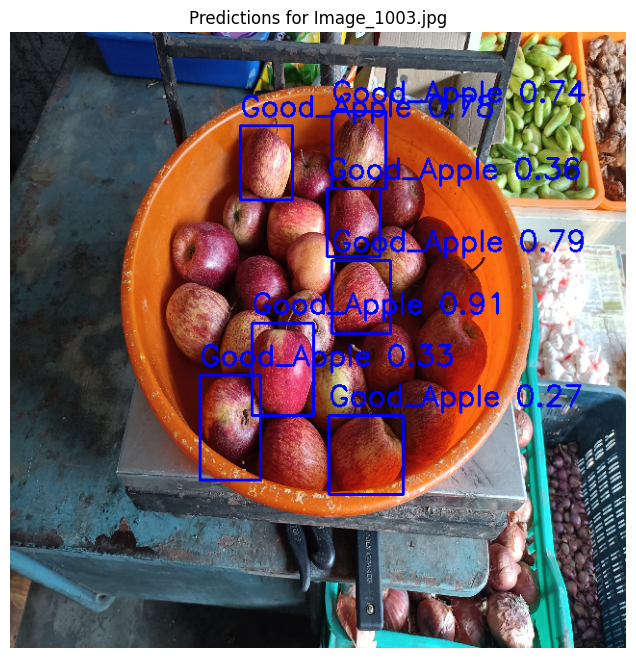

In [8]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# ✅ Load the latest trained model
model_path = "/kaggle/working/fruit_detection_clean_resume/weights/best.pt"  # Update path if needed
model = YOLO(model_path)

# ✅ Select an image for testing
test_image_path = "/kaggle/input/siamese-dataset/AnnotatedFruitNet_FruitBox/dataset/FruitBox/Image_1003.jpg"

# ✅ Resize the image to match training size
image = cv2.imread(test_image_path)
image = cv2.resize(image, (640, 640))  # Resize to 640x640 for consistency

# ✅ Run inference with a lower confidence threshold
results = model.predict(image, conf=0.25)  # Try lowering confidence

# ✅ Draw bounding boxes and labels
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    scores = result.boxes.conf.cpu().numpy()
    class_ids = result.boxes.cls.cpu().numpy()
    class_names = result.names

    for box, score, class_id in zip(boxes, scores, class_ids):
        if score >= 0.25:  # Lower threshold
            x1, y1, x2, y2 = map(int, box)
            label = f"{class_names[int(class_id)]} {score:.2f}"
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw bounding box
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  # Draw label

# ✅ Display the image with detections
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Predictions for {os.path.basename(test_image_path)}")
plt.axis('off')
plt.show()


In [11]:
from ultralytics import YOLO

model = YOLO("/kaggle/working/fruit_detection_clean_resume/weights/best.pt")

results = model.train(
    data="/kaggle/working/data.yaml",
    epochs=50,  # Another 50 epochs
    imgsz=640,
    batch=16,
    lr0=0.001,
    device=0,
    project="/kaggle/working",
    name="fruit_detection_clean_final"
)

print("✅ Further training on clean data started!")


Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/fruit_detection_clean_resume/weights/best.pt, data=/kaggle/working/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=/kaggle/working, name=fruit_detection_clean_final3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

train: Scanning /kaggle/working/preprocessed_data/train/labels.cache... 2192 images, 14 backgrounds, 0 corrupt: 100%|██████████| 2192/2192 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/working/preprocessed_data/valid/labels.cache... 141 images, 0 backgrounds, 0 corrupt: 100%|██████████| 141/141 [00:00<?, ?it/s]


Plotting labels to /kaggle/working/fruit_detection_clean_final3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/fruit_detection_clean_final3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.52G     0.3337     0.2924     0.9421         41        640: 100%|██████████| 137/137 [00:36<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        141        202      0.884      0.825      0.888      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.52G      0.361     0.3341     0.9573         46        640: 100%|██████████| 137/137 [00:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.10it/s]

                   all        141        202      0.929      0.758      0.878      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.52G     0.3758     0.3871     0.9607         46        640: 100%|██████████| 137/137 [00:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]

                   all        141        202      0.838      0.839      0.885      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.52G     0.3909     0.4118     0.9723         53        640: 100%|██████████| 137/137 [00:34<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]

                   all        141        202      0.799       0.81      0.883      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.52G     0.3839     0.3954     0.9691         47        640: 100%|██████████| 137/137 [00:34<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]

                   all        141        202      0.849      0.818      0.872      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.52G     0.3961     0.3916     0.9781         45        640: 100%|██████████| 137/137 [00:34<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

                   all        141        202      0.785      0.803      0.833      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.52G     0.3927     0.4015     0.9727         38        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.22it/s]

                   all        141        202      0.813      0.792      0.827      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.52G     0.3763     0.3896     0.9605         38        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]

                   all        141        202       0.82      0.859      0.883      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.52G     0.3818     0.3851     0.9655         35        640: 100%|██████████| 137/137 [00:34<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]

                   all        141        202      0.827      0.808      0.859      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.52G     0.3845     0.3896     0.9625         55        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]

                   all        141        202      0.836      0.853      0.909      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.52G     0.3804      0.382     0.9673         51        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]

                   all        141        202      0.799      0.833       0.84      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.52G     0.3772     0.3705     0.9608         53        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]

                   all        141        202      0.853      0.815      0.871      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.52G     0.3756     0.3869     0.9627         38        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]

                   all        141        202      0.872      0.787      0.886      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.52G     0.3793     0.3808     0.9687         46        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all        141        202      0.825      0.833      0.885      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.52G     0.3743      0.363     0.9583         43        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]

                   all        141        202      0.827      0.861      0.892      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.52G     0.3743     0.3568     0.9634         40        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all        141        202      0.838       0.85      0.868      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.52G     0.3754     0.3546     0.9629         56        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all        141        202      0.866      0.801      0.888      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.52G     0.3638     0.3444     0.9579         53        640: 100%|██████████| 137/137 [00:34<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]

                   all        141        202      0.882       0.86      0.906      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.52G     0.3628     0.3385     0.9553         50        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]

                   all        141        202      0.848      0.826      0.889       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.52G     0.3637     0.3368     0.9578         46        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]

                   all        141        202      0.827      0.822      0.867      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.52G     0.3526     0.3296     0.9502         54        640: 100%|██████████| 137/137 [00:34<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]

                   all        141        202      0.865      0.828      0.903      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.52G     0.3567     0.3313     0.9585         29        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]

                   all        141        202      0.867      0.895      0.902      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.52G     0.3547     0.3227     0.9503         42        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]

                   all        141        202      0.917      0.785      0.901      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.52G     0.3548     0.3185     0.9517         41        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.08it/s]

                   all        141        202      0.852      0.842      0.874      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.52G     0.3498     0.3116     0.9517         51        640: 100%|██████████| 137/137 [00:34<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all        141        202      0.872      0.873      0.924      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.52G     0.3344     0.2986     0.9406         40        640: 100%|██████████| 137/137 [00:34<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]

                   all        141        202      0.858      0.865      0.883       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.52G     0.3478     0.3051     0.9517         43        640: 100%|██████████| 137/137 [00:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]

                   all        141        202      0.824      0.916      0.939      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.52G     0.3347     0.2974     0.9445         52        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]

                   all        141        202      0.848      0.853      0.918      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.52G      0.337     0.3012      0.953         44        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]

                   all        141        202      0.863      0.817      0.909      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.52G     0.3288     0.2857     0.9415         43        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]

                   all        141        202      0.865      0.862      0.907      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.52G     0.3274     0.2887     0.9406         53        640: 100%|██████████| 137/137 [00:34<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]

                   all        141        202      0.849      0.865      0.905       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.52G     0.3325     0.2814     0.9432         51        640: 100%|██████████| 137/137 [00:34<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]

                   all        141        202      0.913      0.826      0.897      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.52G     0.3298     0.2802     0.9386         43        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all        141        202      0.866      0.858      0.893      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.52G     0.3233     0.2756     0.9386         44        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all        141        202      0.915      0.844      0.914      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.52G     0.3166     0.2688     0.9317         38        640: 100%|██████████| 137/137 [00:34<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]

                   all        141        202      0.887      0.839        0.9      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.52G     0.3177     0.2736     0.9374         54        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]

                   all        141        202      0.887       0.85       0.91      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.52G     0.3155     0.2615     0.9365         37        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]

                   all        141        202      0.876      0.854      0.902      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.52G     0.3203     0.2653     0.9441         39        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]

                   all        141        202      0.842      0.844      0.901      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.52G     0.3172     0.2714     0.9359         37        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

                   all        141        202      0.859      0.827      0.884      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.52G     0.3186     0.2753     0.9442         46        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

                   all        141        202      0.847      0.882      0.906      0.865


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.52G     0.2211     0.1879     0.8509         22        640: 100%|██████████| 137/137 [00:35<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]

                   all        141        202      0.867      0.843      0.912      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.52G     0.2211     0.1851     0.8617         23        640: 100%|██████████| 137/137 [00:34<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]

                   all        141        202      0.888      0.827      0.901      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.52G     0.2159     0.1781     0.8518         18        640: 100%|██████████| 137/137 [00:34<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]

                   all        141        202      0.877      0.858      0.917      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.52G     0.2099      0.167     0.8506         23        640: 100%|██████████| 137/137 [00:34<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all        141        202       0.92      0.792      0.912      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.52G     0.2073     0.1637     0.8479         17        640: 100%|██████████| 137/137 [00:34<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]

                   all        141        202      0.901      0.822      0.909      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.52G     0.2058     0.1631     0.8458         18        640: 100%|██████████| 137/137 [00:34<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all        141        202      0.871      0.828      0.901      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.52G     0.2013     0.1601     0.8427         16        640: 100%|██████████| 137/137 [00:34<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]

                   all        141        202      0.921      0.836      0.909      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.52G     0.2022     0.1599     0.8413         25        640: 100%|██████████| 137/137 [00:34<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]

                   all        141        202      0.843      0.853      0.903      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.52G     0.1961     0.1515     0.8448         22        640: 100%|██████████| 137/137 [00:34<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all        141        202      0.839      0.872      0.906      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.52G     0.1947     0.1495     0.8388         19        640: 100%|██████████| 137/137 [00:34<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]

                   all        141        202       0.88      0.834      0.907      0.872



50 epochs completed in 0.504 hours.
Optimizer stripped from /kaggle/working/fruit_detection_clean_final3/weights/last.pt, 22.5MB
Optimizer stripped from /kaggle/working/fruit_detection_clean_final3/weights/best.pt, 22.5MB

Validating /kaggle/working/fruit_detection_clean_final3/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]


                   all        141        202      0.824      0.916      0.939      0.889
             Bad_Apple         25         26      0.931          1      0.992      0.951
             Bad_Guava         15         19      0.899          1      0.995       0.93
             Bad_Mango         14         17      0.845      0.959      0.975      0.962
            Bad_Orange         27         36      0.901      0.944      0.966      0.941
            Good_Apple         15         31      0.802      0.912      0.932      0.873
            Good_Guava         15         26      0.837      0.731      0.861      0.781
            Good_Mango         15         29      0.583      0.931       0.88      0.827
           Good_Orange         15         18      0.793      0.853      0.914      0.849


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to /kaggle/working/fruit_detection_clean_final3
✅ Further training on clean data started!



0: 640x640 8 Good_Apples, 16.2ms
Speed: 1.5ms preprocess, 16.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


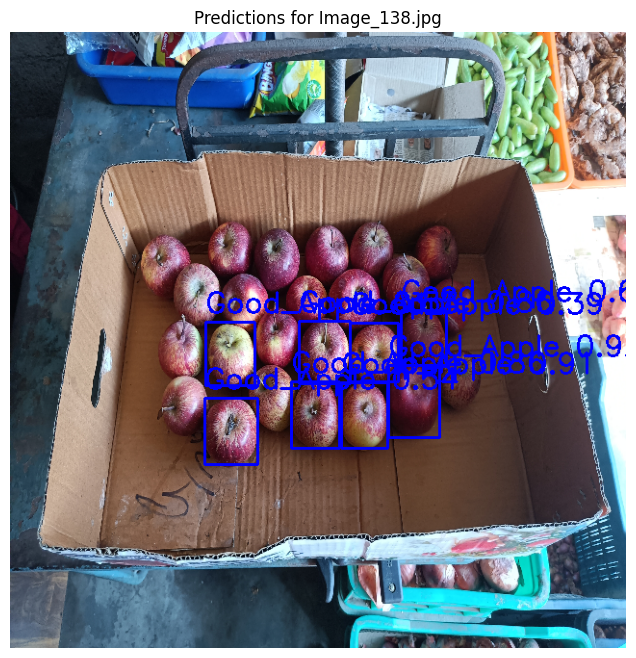

In [16]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# ✅ Load the latest trained model
model_path = "/kaggle/working/fruit_detection_clean_final3/weights/best.pt"  # Update path if needed
model = YOLO(model_path)

# ✅ Select an image for testing
test_image_path = "/kaggle/input/siamese-dataset/AnnotatedFruitNet_FruitBox/dataset/FruitBox/Image_138.jpg"

# ✅ Resize the image to match training size
image = cv2.imread(test_image_path)
image = cv2.resize(image, (640, 640))  # Resize to 640x640 for consistency

# ✅ Run inference with a lower confidence threshold
results = model.predict(image, conf=0.25)  # Try lowering confidence

# ✅ Draw bounding boxes and labels
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    scores = result.boxes.conf.cpu().numpy()
    class_ids = result.boxes.cls.cpu().numpy()
    class_names = result.names

    for box, score, class_id in zip(boxes, scores, class_ids):
        if score >= 0.25:  # Lower threshold
            x1, y1, x2, y2 = map(int, box)
            label = f"{class_names[int(class_id)]} {score:.2f}"
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw bounding box
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  # Draw label

# ✅ Display the image with detections
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Predictions for {os.path.basename(test_image_path)}")
plt.axis('off')
plt.show()


In [3]:
import shutil

# Path to your current best trained model on clean data
clean_model_path = "/kaggle/working/fruit_detection_clean_resume/weights/best.pt"

# Save a copy before training on noisy data
backup_model_path = "/kaggle/working/best_clean_model.pt"

shutil.copy(clean_model_path, backup_model_path)
print(f"✅ Clean model saved as {backup_model_path}")


✅ Clean model saved as /kaggle/working/best_clean_model.pt


In [4]:
import os

noisy_train_path = "/kaggle/working/noisy_data/train/images"
noisy_val_path = "/kaggle/working/noisy_data/valid/images"

# Check if directories exist and contain images
if os.path.exists(noisy_train_path) and len(os.listdir(noisy_train_path)) > 0:
    print(f"✅ Noisy training images found in {noisy_train_path}. Total:", len(os.listdir(noisy_train_path)))
else:
    print(f"❌ No noisy training images found in {noisy_train_path}. Check preprocessing!")

if os.path.exists(noisy_val_path) and len(os.listdir(noisy_val_path)) > 0:
    print(f"✅ Noisy validation images found in {noisy_val_path}. Total:", len(os.listdir(noisy_val_path)))
else:
    print(f"❌ No noisy validation images found in {noisy_val_path}. Check preprocessing!")


❌ No noisy training images found in /kaggle/working/noisy_data/train/images. Check preprocessing!
❌ No noisy validation images found in /kaggle/working/noisy_data/valid/images. Check preprocessing!


In [5]:
import cv2
import numpy as np
import os
from tqdm import tqdm

# Paths
clean_train_path = "/kaggle/working/preprocessed_data/train/images"
clean_val_path = "/kaggle/working/preprocessed_data/valid/images"
noisy_train_path = "/kaggle/working/noisy_data/train/images"
noisy_val_path = "/kaggle/working/noisy_data/valid/images"

# Create directories for noisy images
os.makedirs(noisy_train_path, exist_ok=True)
os.makedirs(noisy_val_path, exist_ok=True)

# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, var=30):
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    noisy = cv2.add(image, gauss)
    return np.clip(noisy, 0, 255)

# Function to add Salt & Pepper noise
def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy = np.copy(image)
    total_pixels = image.shape[0] * image.shape[1]

    # Salt (white) noise
    num_salt = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape[:2]]
    noisy[salt_coords[0], salt_coords[1]] = 255

    # Pepper (black) noise
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape[:2]]
    noisy[pepper_coords[0], pepper_coords[1]] = 0

    return noisy

# Apply noise to training images
for img_name in tqdm(os.listdir(clean_train_path), desc="Processing Train Images"):
    img_path = os.path.join(clean_train_path, img_name)
    image = cv2.imread(img_path)

    if image is None:
        print(f"⚠️ Skipping {img_name} (could not read)")
        continue

    # Apply Gaussian noise
    gaussian_img = add_gaussian_noise(image)
    cv2.imwrite(os.path.join(noisy_train_path, f"gaussian_{img_name}"), gaussian_img)

    # Apply Salt & Pepper noise
    sp_img = add_salt_pepper_noise(image)
    cv2.imwrite(os.path.join(noisy_train_path, f"sp_{img_name}"), sp_img)

# Apply noise to validation images
for img_name in tqdm(os.listdir(clean_val_path), desc="Processing Validation Images"):
    img_path = os.path.join(clean_val_path, img_name)
    image = cv2.imread(img_path)

    if image is None:
        print(f"⚠️ Skipping {img_name} (could not read)")
        continue

    # Apply Gaussian noise
    gaussian_img = add_gaussian_noise(image)
    cv2.imwrite(os.path.join(noisy_val_path, f"gaussian_{img_name}"), gaussian_img)

    # Apply Salt & Pepper noise
    sp_img = add_salt_pepper_noise(image)
    cv2.imwrite(os.path.join(noisy_val_path, f"sp_{img_name}"), sp_img)

print("✅ Noisy images (Gaussian + Salt & Pepper) successfully generated and saved!")


Processing Validation Images: 100%|██████████| 141/141 [00:07<00:00, 18.39it/s]

✅ Noisy images (Gaussian + Salt & Pepper) successfully generated and saved!


In [7]:
data_yaml_noisy = """
train: /kaggle/working/noisy_data/train/images
val: /kaggle/working/noisy_data/valid/images
nc: 8
names:
  - Bad_Apple
  - Bad_Guava
  - Bad_Mango
  - Bad_Orange
  - Good_Apple
  - Good_Guava
  - Good_Mango
  - Good_Orange
"""

data_yaml_noisy_path = "/kaggle/working/data_noisy.yaml"
with open(data_yaml_noisy_path, "w") as file:
    file.write(data_yaml_noisy)

print(f"✅ data.yaml for noisy training created at {data_yaml_noisy_path}")


✅ data.yaml for noisy training created at /kaggle/working/data_noisy.yaml


In [2]:
from ultralytics import YOLO

# Load a copy of the clean model to train with noise
model = YOLO("/kaggle/working/best_clean_model.pt")

# Train on noisy data
results = model.train(
    data="/kaggle/working/data_noisy.yaml",
    epochs=30,  
    imgsz=640,
    batch=16,
    lr0=0.001,
    device=0,
    project="/kaggle/working",
    name="fruit_detection_noisy"
)

print("✅ Noisy data training completed!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/best_clean_model.pt, data=/kaggle/working/data_noisy.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=/kaggle/working, name=fruit_detection_noisy, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=

100%|██████████| 755k/755k [00:00<00:00, 17.3MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

train: Scanning /kaggle/working/noisy_data/train/labels... 0 images, 4384 backgrounds, 0 corrupt: 100%|██████████| 4384/4384 [00:02<00:00, 1944.17it/s]

train: WARNING ⚠️ No labels found in /kaggle/working/noisy_data/train/labels.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


train: New cache created: /kaggle/working/noisy_data/train/labels.cache
WARNING ⚠️ No labels found in /kaggle/working/noisy_data/train/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/working/noisy_data/valid/labels... 0 images, 282 backgrounds, 0 corrupt: 100%|██████████| 282/282 [00:00<00:00, 2224.76it/s]

val: WARNING ⚠️ No labels found in /kaggle/working/noisy_data/valid/labels.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
val: New cache created: /kaggle/working/noisy_data/valid/labels.cache
WARNING ⚠️ No labels found in /kaggle/working/noisy_data/valid/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to /kaggle/working/fruit_detection_noisy/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/fruit_detection_noisy
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.71G          0      35.48          0          0        640: 100%|██████████| 274/274 [01:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.06it/s]


RuntimeError: torch.cat(): expected a non-empty list of Tensors

In [3]:
import os

# Paths to training & validation images
train_images_path = "/kaggle/working/noisy_data/train/images"
val_images_path = "/kaggle/working/noisy_data/valid/images"

# Check if directories exist and contain images
def check_images(path):
    if os.path.exists(path) and len(os.listdir(path)) > 0:
        print(f"✅ {len(os.listdir(path))} images found in {path}")
    else:
        print(f"❌ No images found in {path}. Check preprocessing!")

# Run the check
check_images(train_images_path)
check_images(val_images_path)


✅ 4384 images found in /kaggle/working/noisy_data/train/images
✅ 282 images found in /kaggle/working/noisy_data/valid/images


In [5]:
import os

clean_train_labels = "/kaggle/working/preprocessed_data/train/labels"
clean_valid_labels = "/kaggle/working/preprocessed_data/valid/labels"

# Check if labels exist
def check_labels(path):
    if os.path.exists(path) and len(os.listdir(path)) > 0:
        print(f"✅ {len(os.listdir(path))} labels found in {path}")
    else:
        print(f"❌ No labels found in {path}. Something is wrong!")

# Run checks
check_labels(clean_train_labels)
check_labels(clean_valid_labels)


✅ 2192 labels found in /kaggle/working/preprocessed_data/train/labels
✅ 141 labels found in /kaggle/working/preprocessed_data/valid/labels
